In [1]:
# Cell 1: imports and project paths
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

ROOT = Path(r"C:\Users\thanv\Documents\Cricket_Player_Performance")
RAW = ROOT / "data" / "raw"
PROC = ROOT / "data" / "processed"
ART = ROOT / "artifacts"

print("ROOT:", ROOT)
print("RAW exists:", RAW.exists(), "  files:", list(RAW.iterdir()) if RAW.exists() else "RAW missing")
print("PROCESSED exists:", PROC.exists())
print("ARTIFACTS exists:", ART.exists())

ROOT: C:\Users\thanv\Documents\Cricket_Player_Performance
RAW exists: True   files: [WindowsPath('C:/Users/thanv/Documents/Cricket_Player_Performance/data/raw/deliveries.csv'), WindowsPath('C:/Users/thanv/Documents/Cricket_Player_Performance/data/raw/matches.csv'), WindowsPath('C:/Users/thanv/Documents/Cricket_Player_Performance/data/raw/most_runs_average_strikerate.csv'), WindowsPath('C:/Users/thanv/Documents/Cricket_Player_Performance/data/raw/Players.xlsx'), WindowsPath('C:/Users/thanv/Documents/Cricket_Player_Performance/data/raw/teams.csv'), WindowsPath('C:/Users/thanv/Documents/Cricket_Player_Performance/data/raw/teamwise_home_and_away.csv')]
PROCESSED exists: True
ARTIFACTS exists: True


In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np

ROOT = Path(r"C:\Users\thanv\Documents\Cricket_Player_Performance")
RAW = ROOT / "data" / "raw"
PROC = ROOT / "data" / "processed"

# load (safe)
deliveries = pd.read_csv(RAW / "deliveries.csv")
matches = pd.read_csv(RAW / "matches.csv")

# optional others
try:
    most_runs = pd.read_csv(RAW / "most_runs_average_strikerate.csv")
except Exception:
    most_runs = None
try:
    players = pd.read_excel(RAW / "Players.xlsx")
except Exception:
    players = None
try:
    teams = pd.read_csv(RAW / "teams.csv")
except Exception:
    teams = None
try:
    homeaway = pd.read_csv(RAW / "teamwise_home_and_away.csv")
except Exception:
    homeaway = None

# summary function
def summary(df, name):
    print(f"\n--- {name} ---")
    if df is None:
        print("Missing or failed to load")
        return
    print("shape:", df.shape)
    print("columns:", df.columns.tolist())
    miss = (df.isnull().mean() * 100).sort_values(ascending=False)
    print("\nTop missing (%) (showing up to 20):")
    print(miss.head(20))
    display(df.head(3))

# run summaries
summary(deliveries, "deliveries")
summary(matches, "matches")
summary(most_runs, "most_runs")
summary(players, "players")
summary(teams, "teams")
summary(homeaway, "teamwise_home_and_away")


--- deliveries ---
shape: (179078, 21)
columns: ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind', 'fielder']

Top missing (%) (showing up to 20):
fielder             96.399334
player_dismissed    95.066954
dismissal_kind      95.066954
inning               0.000000
match_id             0.000000
over                 0.000000
bowling_team         0.000000
batting_team         0.000000
ball                 0.000000
is_super_over        0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
legbye_runs          0.000000
bye_runs             0.000000
wide_runs            0.000000
noball_runs          0.000000
extra_runs           0.000000
batsman_runs         0.000000
penalty_runs         0.000000
dtype: float64


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN



--- matches ---
shape: (756, 18)
columns: ['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']

Top missing (%) (showing up to 20):
umpire3            84.259259
city                0.925926
winner              0.529101
player_of_match     0.529101
umpire1             0.264550
umpire2             0.264550
Season              0.000000
id                  0.000000
team1               0.000000
date                0.000000
dl_applied          0.000000
result              0.000000
toss_decision       0.000000
toss_winner         0.000000
team2               0.000000
win_by_runs         0.000000
win_by_wickets      0.000000
venue               0.000000
dtype: float64


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN



--- most_runs ---
shape: (516, 6)
columns: ['batsman', 'total_runs', 'out', 'numberofballs', 'average', 'strikerate']

Top missing (%) (showing up to 20):
average          6.589147
batsman          0.000000
total_runs       0.000000
out              0.000000
numberofballs    0.000000
strikerate       0.000000
dtype: float64


,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466



--- players ---
shape: (566, 5)
columns: ['Player_Name', 'DOB', 'Batting_Hand', 'Bowling_Skill', 'Country']

Top missing (%) (showing up to 20):
DOB              16.784452
Country          16.784452
Bowling_Skill    11.307420
Batting_Hand      0.530035
Player_Name       0.000000
dtype: float64


,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India



--- teams ---
shape: (15, 1)
columns: ['team1']

Top missing (%) (showing up to 20):
team1    0.0
dtype: float64


,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals



--- teamwise_home_and_away ---
shape: (14, 7)
columns: ['team', 'home_wins', 'away_wins', 'home_matches', 'away_matches', 'home_win_percentage', 'away_win_percentage']

Top missing (%) (showing up to 20):
team                   0.0
home_wins              0.0
away_wins              0.0
home_matches           0.0
away_matches           0.0
home_win_percentage    0.0
away_win_percentage    0.0
dtype: float64


,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333


In [3]:
# Run this cell and paste the output here
print("--- matches basic info ---")
print("shape:", matches.shape)
print("columns:", matches.columns.tolist())
print("\nTop missing (%):")
print((matches.isnull().mean()*100).sort_values(ascending=False).head(30))
print("\nSample date values (first 10):")
print(matches['date'].head(10).tolist() if 'date' in matches.columns else "no 'date' column")
print("\nUnique venues (first 10):")
print(pd.Series(matches['venue'].dropna().unique()).astype(str).head(10).tolist() if 'venue' in matches.columns else "no 'venue' column")
print("\nUnique team1 values (first 15):")
print(pd.Series(matches['team1'].dropna().unique()).astype(str).head(15).tolist() if 'team1' in matches.columns else "no 'team1' column")


--- matches basic info ---
shape: (756, 18)
columns: ['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']

Top missing (%):
umpire3            84.259259
city                0.925926
winner              0.529101
player_of_match     0.529101
umpire1             0.264550
umpire2             0.264550
Season              0.000000
id                  0.000000
team1               0.000000
date                0.000000
dl_applied          0.000000
result              0.000000
toss_decision       0.000000
toss_winner         0.000000
team2               0.000000
win_by_runs         0.000000
win_by_wickets      0.000000
venue               0.000000
dtype: float64

Sample date values (first 10):
['05-04-2017', '06-04-2017', '07-04-2017', '08-04-2017', '08-04-2017', '09-04-2017', '09-04-2017', '10-04-2017', '11-04-2017', '12-04-2017']

Unique 

In [4]:
from pathlib import Path
import pandas as pd

ROOT = Path(r"C:\Users\thanv\Documents\Cricket_Player_Performance")
RAW = ROOT / "data" / "raw"
PROC = ROOT / "data" / "processed"

matches = pd.read_csv(RAW / "matches.csv")

# 1) Parse date (dataset uses DD-MM-YYYY)
matches['date_parsed'] = pd.to_datetime(matches['date'], dayfirst=True, errors='coerce')

# report parsing
parsed_ok = matches['date_parsed'].notna().sum()
parsed_bad = matches['date_parsed'].isna().sum()

# 2) Clean venue strings (strip whitespace/newlines)
if 'venue' in matches.columns:
    matches['venue'] = matches['venue'].astype(str).str.strip().replace({'nan': None})

# 3) Canonicalize some team name variants observed in dataset
team_map = {
    "Rising Pune Supergiant": "Rising Pune Supergiant",
    "Rising Pune Supergiants": "Rising Pune Supergiant",
    "Delhi Daredevils": "Delhi Capitals",   # map older name to current canonical
    "Deccan Chargers": "Deccan Chargers",
    "Pune Warriors": "Pune Warriors",
    "Kings XI Punjab": "Kings XI Punjab",
    # add more if you find other variants
}
for col in ['team1','team2','toss_winner','winner']:
    if col in matches.columns:
        matches[col] = matches[col].astype(str).str.strip().replace(team_map)

# 4) Fill small missing categorical fields with 'Unknown' (but keep winners as NaN if absent)
cat_cols = matches.select_dtypes(include='object').columns.tolist()
for c in cat_cols:
    if c not in ['winner','player_of_match']:  # keep these NaN if missing
        matches[c] = matches[c].fillna('Unknown')

# 5) Save cleaned matches
proc_path = PROC / "matches_cleaned.csv"
matches.to_csv(proc_path, index=False)

# Print summary for you to paste back
print("Saved cleaned matches to:", proc_path)
print("Date parsing: valid =", parsed_ok, ", invalid =", parsed_bad)
print("Sample parsed dates:", matches['date_parsed'].dropna().head(5).astype(str).tolist())
print("Sample unique team1 values (first 12):", pd.Series(matches['team1'].unique()).astype(str).head(12).tolist())


Saved cleaned matches to: C:\Users\thanv\Documents\Cricket_Player_Performance\data\processed\matches_cleaned.csv
Date parsing: valid = 756 , invalid = 0
Sample parsed dates: ['2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08', '2017-04-08']
Sample unique team1 values (first 12): ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers', 'Kochi Tuskers Kerala']


In [5]:
from pathlib import Path
import pandas as pd
import numpy as np

ROOT = Path(r"C:\Users\thanv\Documents\Cricket_Player_Performance")
RAW = ROOT / "data" / "raw"
PROC = ROOT / "data" / "processed"

deliveries = pd.read_csv(RAW / "deliveries.csv")

# 1) Strip whitespace on object cols
for c in deliveries.select_dtypes(include='object').columns:
    deliveries[c] = deliveries[c].astype(str).str.strip().replace({'nan': None})

# 2) Create is_wicket flag (True when player_dismissed not null)
deliveries['is_wicket'] = deliveries['player_dismissed'].notna()

# 3) Drop exact duplicates
before = len(deliveries)
deliveries = deliveries.drop_duplicates()
after = len(deliveries)
dropped = before - after

# 4) Outlier flags (IQR) for batsman_runs and total_runs
for col in ['batsman_runs', 'total_runs']:
    if col in deliveries.columns:
        s = deliveries[col].dropna().astype(float)
        q1 = s.quantile(0.25)
        q3 = s.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        deliveries[f'{col}_outlier_flag'] = deliveries[col].apply(
            lambda x: False if pd.isna(x) else ((x < lower) or (x > upper))
        )

# 5) Validate ball/over values
ball_invalid = deliveries[(deliveries['ball'] < 1) | (deliveries['ball'] > 10)]
ball_invalid_count = len(ball_invalid)

# 6) Save cleaned deliveries
proc_path = PROC / "deliveries_cleaned.csv"
deliveries.to_csv(proc_path, index=False)

# 7) Print summary
print("Saved cleaned deliveries to:", proc_path)
print("Original rows:", before, "After drop duplicates:", after, "Dropped:", dropped)
print("Outlier flags added for columns (if present):", [c for c in deliveries.columns if c.endswith('_outlier_flag')])
print("Number of rows with unusual 'ball' values (<1 or >10):", ball_invalid_count)
if ball_invalid_count > 0:
    print("Sample unusual rows (first 5):")
    display(ball_invalid.head(5))

# show top missing %
print("\nTop missing (%) in cleaned deliveries:")
print((deliveries.isnull().mean()*100).sort_values(ascending=False).head(15))

# show sample
display(deliveries.head(5))


Saved cleaned deliveries to: C:\Users\thanv\Documents\Cricket_Player_Performance\data\processed\deliveries_cleaned.csv
Original rows: 179078 After drop duplicates: 179055 Dropped: 23
Outlier flags added for columns (if present): ['batsman_runs_outlier_flag', 'total_runs_outlier_flag']
Number of rows with unusual 'ball' values (<1 or >10): 0

Top missing (%) in cleaned deliveries:
fielder             96.398872
dismissal_kind      95.066320
player_dismissed    95.066320
match_id             0.000000
over                 0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
non_striker          0.000000
batsman              0.000000
ball                 0.000000
bowler               0.000000
legbye_runs          0.000000
is_super_over        0.000000
wide_runs            0.000000
dtype: float64


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,is_wicket,batsman_runs_outlier_flag,total_runs_outlier_flag
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,None,None,None,False,False,False
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,None,None,None,False,False,False
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,None,None,None,False,True,True
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,None,None,None,False,False,False
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,None,None,None,False,False,False


In [6]:
from pathlib import Path
import pandas as pd

ROOT = Path(r"C:\Users\thanv\Documents\Cricket_Player_Performance")
PROC = ROOT / "data" / "processed"

# load cleaned files
deliveries = pd.read_csv(PROC / "deliveries_cleaned.csv")
matches = pd.read_csv(PROC / "matches_cleaned.csv")

# ensure match_id types align (string)
deliveries['match_id'] = deliveries['match_id'].astype(str)
if 'match_id' in matches.columns:
    matches['match_id'] = matches['match_id'].astype(str)
elif 'id' in matches.columns:
    matches = matches.rename(columns={'id':'match_id'})
    matches['match_id'] = matches['match_id'].astype(str)

# aggregation
agg = deliveries.groupby(['match_id','batsman'], as_index=False).agg(
    runs = ('batsman_runs','sum'),
    balls = ('ball','count'),
    fours = ('batsman_runs', lambda s: (s==4).sum()),
    sixes = ('batsman_runs', lambda s: (s==6).sum()),
    dismissals = ('player_dismissed', lambda s: s.notna().sum())
)

# merge match metadata (only columns we need)
merge_cols = ['match_id']
for c in ['date_parsed','venue','team1','team2','Season','city']:
    if c in matches.columns:
        merge_cols.append(c)

merged = agg.merge(matches[merge_cols].drop_duplicates(subset=['match_id']), on='match_id', how='left')

out_path = PROC / "batsman_match.csv"
merged.to_csv(out_path, index=False)

print("Saved batsman_match.csv to:", out_path)
print("Shape:", merged.shape)
print("\nTop rows (sample):")
display(merged.head(8))

print("\nMissing metadata counts (date_parsed, venue, team1, team2):")
for c in ['date_parsed','venue','team1','team2']:
    if c in merged.columns:
        print(c, "missing:", merged[c].isna().sum())


Saved batsman_match.csv to: C:\Users\thanv\Documents\Cricket_Player_Performance\data\processed\batsman_match.csv
Shape: (11294, 13)

Top rows (sample):


,match_id,batsman,runs,balls,fours,sixes,dismissals,date_parsed,venue,team1,team2,Season,city
0,1,A Choudhary,6,2,0,1,1,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,IPL-2017,Hyderabad
1,1,BCJ Cutting,16,6,0,2,0,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,IPL-2017,Hyderabad
2,1,CH Gayle,32,23,2,3,1,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,IPL-2017,Hyderabad
3,1,DA Warner,14,9,2,1,1,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,IPL-2017,Hyderabad
4,1,DJ Hooda,16,12,0,1,0,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,IPL-2017,Hyderabad
5,1,KM Jadhav,31,18,4,1,1,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,IPL-2017,Hyderabad
6,1,MC Henriques,52,37,3,2,1,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,IPL-2017,Hyderabad
7,1,Mandeep Singh,24,16,5,0,1,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,IPL-2017,Hyderabad



Missing metadata counts (date_parsed, venue, team1, team2):
date_parsed missing: 0
venue missing: 0
team1 missing: 0
team2 missing: 0


In [9]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib

ROOT = Path(r"C:\Users\thanv\Documents\Cricket_Player_Performance")
PROC = ROOT / "data" / "processed"
ART = ROOT / "artifacts"
ART.mkdir(parents=True, exist_ok=True)

# load aggregated batsman-match file
df = pd.read_csv(PROC / "batsman_match.csv")

# ensure date_parsed exists and is datetime
if 'date_parsed' in df.columns:
    df['date_parsed'] = pd.to_datetime(df['date_parsed'], errors='coerce')
else:
    # fallback: find any date-like column
    date_cols = [c for c in df.columns if 'date' in c.lower()]
    if date_cols:
        df['date_parsed'] = pd.to_datetime(df[date_cols[0]], errors='coerce')
    else:
        df['date_parsed'] = pd.NaT

# sort by batsman and date
df = df.sort_values(['batsman','date_parsed']).reset_index(drop=True)

# rolling 5-match features (shifted to avoid leakage) — use transform for alignment
df['runs_rolling_5'] = df.groupby('batsman')['runs'].transform(lambda s: s.shift(1).rolling(5, min_periods=1).mean())
df['balls_rolling_5'] = df.groupby('batsman')['balls'].transform(lambda s: s.shift(1).rolling(5, min_periods=1).mean())

# career cumulative up to previous match (transform + cumcount for alignment)
df['career_runs'] = df.groupby('batsman')['runs'].transform(lambda s: s.shift(1).cumsum().fillna(0))
df['career_matches'] = df.groupby('batsman').cumcount()  # counts previous matches per batsman

# rolling strike rate (guard divide by zero)
df['strike_rate_rolling_5'] = (df['runs_rolling_5'] / df['balls_rolling_5'] * 100).replace([np.inf, -np.inf], np.nan)

# new player flag (less than 5 prior matches)
df['new_player'] = (df['career_matches'] < 5).astype(int)

# Fill NaNs in rolling features with league medians (so model gets numeric values)
med_runs = df['runs_rolling_5'].median()
med_balls = df['balls_rolling_5'].median()
med_sr = df['strike_rate_rolling_5'].median()

df['runs_rolling_5'] = df['runs_rolling_5'].fillna(med_runs)
df['balls_rolling_5'] = df['balls_rolling_5'].fillna(med_balls)
df['strike_rate_rolling_5'] = df['strike_rate_rolling_5'].fillna(med_sr)

# select model-ready columns
model_cols = [
    'match_id','batsman','date_parsed','venue','team1','team2',
    'runs','balls','dismissals',
    'runs_rolling_5','balls_rolling_5','strike_rate_rolling_5',
    'career_runs','career_matches','new_player'
]
model_df = df[[c for c in model_cols if c in df.columns]].copy()

# save model-ready CSV
out_path = PROC / "batsman_match_model_ready.csv"
model_df.to_csv(out_path, index=False)

# build an initial preprocessor (fit on a sample for speed; refit on train set later)
num_features = [c for c in ['runs_rolling_5','balls_rolling_5','strike_rate_rolling_5','career_runs','career_matches'] if c in model_df.columns]
cat_features = [c for c in ['venue','team1','team2','new_player'] if c in model_df.columns]

num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, num_features),
    ('cat', cat_pipe, cat_features)
], remainder='drop')

# fit on a sample to speed up (we will refit on train during modeling)
sample = model_df[num_features + cat_features].fillna(0).head(5000)
preprocessor.fit(sample)
preproc_path = ART / "preprocessor_initial.pkl"
joblib.dump(preprocessor, preproc_path)

# print summary for you to paste back
print("Saved model-ready CSV to:", out_path)
print("Model-ready shape:", model_df.shape)
print("\nTop null counts (model-ready):")
print(model_df.isnull().sum().sort_values(ascending=False).head(20))
print("\nSaved initial preprocessor to:", preproc_path)


Saved model-ready CSV to: C:\Users\thanv\Documents\Cricket_Player_Performance\data\processed\batsman_match_model_ready.csv
Model-ready shape: (11294, 15)

Top null counts (model-ready):
match_id                 0
batsman                  0
date_parsed              0
venue                    0
team1                    0
team2                    0
runs                     0
balls                    0
dismissals               0
runs_rolling_5           0
balls_rolling_5          0
strike_rate_rolling_5    0
career_runs              0
career_matches           0
new_player               0
dtype: int64

Saved initial preprocessor to: C:\Users\thanv\Documents\Cricket_Player_Performance\artifacts\preprocessor_initial.pkl


=== Distribution: batsman_runs per delivery ===
batsman_runs
0    70836
1    67511
2    11471
3      587
4    20390
5       79
6     8170
7       11
Name: count, dtype: int64


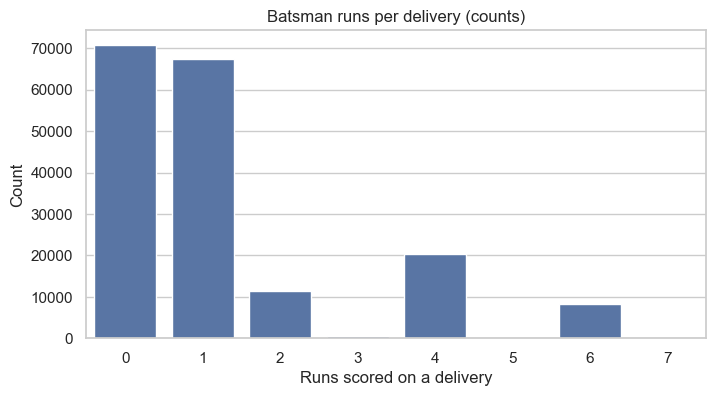


=== Distribution: runs per player-match (summary) ===
count    11294.000000
mean        19.768550
std         21.125879
min          0.000000
25%          4.000000
50%         13.000000
75%         29.000000
max        175.000000
Name: runs, dtype: float64


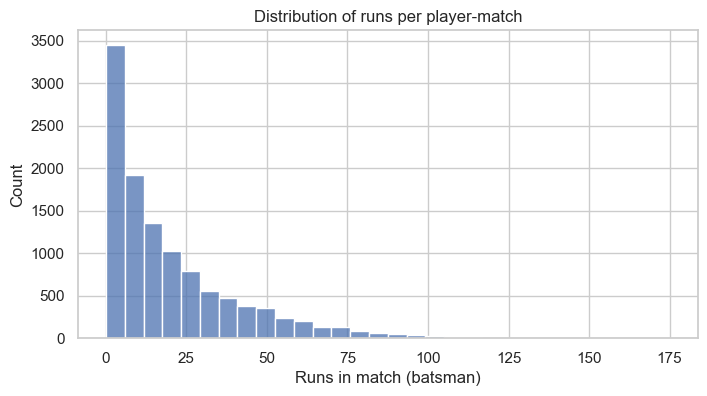


=== Wicket counts per player-match (how many times dismissed in a match) ===
dismissals
0    2686
1    8386
2     218
3       4
Name: count, dtype: int64

=== Wickets per match (summary) ===
count    756.000000
mean      11.685185
std        3.117367
min        3.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       21.000000
Name: wickets, dtype: float64


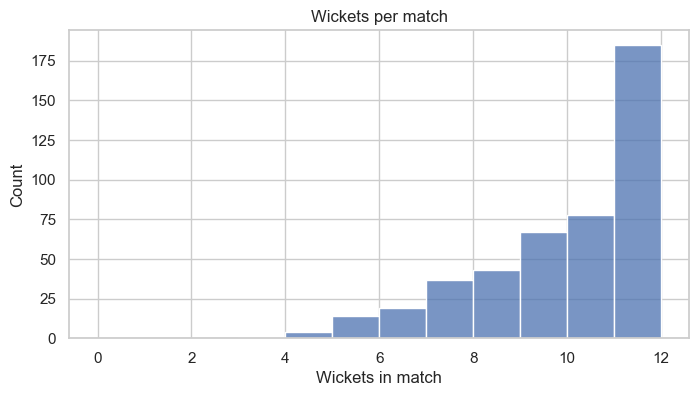

matches missing match_id — cannot compute venue stats.

=== Top 10 teams by wins (all seasons) ===
                          team  wins
0               Mumbai Indians   109
1          Chennai Super Kings   100
2        Kolkata Knight Riders    92
3  Royal Challengers Bangalore    84
4              Kings XI Punjab    82
5               Delhi Capitals    77
6             Rajasthan Royals    75
7          Sunrisers Hyderabad    58
8              Deccan Chargers    29
9       Rising Pune Supergiant    15

=== Top 10 teams by total runs (all seasons) ===
                   batting_team  total_runs
8                Mumbai Indians       29806
13  Royal Challengers Bangalore       28125
5               Kings XI Punjab       27891
7         Kolkata Knight Riders       27415
0           Chennai Super Kings       26418
3              Delhi Daredevils       24388
10             Rajasthan Royals       22425
14          Sunrisers Hyderabad       17055
1               Deccan Chargers       11463
9   

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Royal Challengers Bangalore,Sunrisers Hyderabad
Season,,,,,,,,,,,,,
IPL-2008,9,2,7,0,10,0,6,7,0,13,0,4,0
IPL-2009,8,9,10,0,7,0,3,5,0,6,0,9,0
IPL-2010,9,8,7,0,4,0,7,11,0,6,0,8,0
IPL-2011,11,6,4,0,7,6,8,10,4,6,0,10,0
IPL-2012,10,4,11,0,8,0,12,10,4,7,0,8,0



Saved summary CSVs to data/processed/: venue_stats_summary.csv, team_wins_overall.csv, team_total_runs_overall.csv, team_wins_per_season_sample.csv (where applicable).


In [11]:
#Task-3 EDA — distributions, wickets, venue stats, team performance
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ROOT = Path(r"C:\Users\thanv\Documents\Cricket_Player_Performance")
RAW = ROOT / "data" / "raw"
PROC = ROOT / "data" / "processed"

# load cleaned files
deliveries = pd.read_csv(PROC / "deliveries_cleaned.csv")
matches = pd.read_csv(PROC / "matches_cleaned.csv")
batsman_match = pd.read_csv(PROC / "batsman_match_model_ready.csv")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,4)

# 1) Distribution: batsman_runs per delivery (deliveries)
print("=== Distribution: batsman_runs per delivery ===")
print(deliveries['batsman_runs'].value_counts().sort_index())
plt.figure()
sns.countplot(data=deliveries, x='batsman_runs', order=sorted(deliveries['batsman_runs'].unique()))
plt.title("Batsman runs per delivery (counts)")
plt.xlabel("Runs scored on a delivery")
plt.ylabel("Count")
plt.show()

# 2) Distribution: runs per player-match (aggregated)
print("\n=== Distribution: runs per player-match (summary) ===")
print(batsman_match['runs'].describe())
plt.figure()
sns.histplot(batsman_match['runs'], bins=30, kde=False)
plt.title("Distribution of runs per player-match")
plt.xlabel("Runs in match (batsman)")
plt.show()

# 3) Wicket distribution (per player-match and per match)
print("\n=== Wicket counts per player-match (how many times dismissed in a match) ===")
print(batsman_match['dismissals'].value_counts().sort_index())

# wickets per match (total wickets in match)
if 'match_id' in deliveries.columns:
    wickets_by_match = deliveries[deliveries['player_dismissed'].notna()].groupby('match_id').size().rename('wickets')
    print("\n=== Wickets per match (summary) ===")
    print(wickets_by_match.describe())
    # plot
    plt.figure()
    sns.histplot(wickets_by_match, bins=range(0,13))
    plt.title("Wickets per match")
    plt.xlabel("Wickets in match")
    plt.show()
else:
    print("deliveries missing match_id — cannot compute wickets per match.")

# 4) Venue-level stats: average match runs (team totals combined) — we need per-match total runs
# compute per-match total runs from deliveries
match_totals = deliveries.groupby('match_id')['total_runs'].sum().reset_index().rename(columns={'total_runs':'match_total_runs'})
# merge venue info
if 'match_id' in matches.columns:
    matches['match_id'] = matches['match_id'].astype(str)
    match_totals['match_id'] = match_totals['match_id'].astype(str)
    mt = match_totals.merge(matches[['match_id','venue','Season']], on='match_id', how='left')
    venue_stats = mt.groupby('venue').agg(
        matches_played = ('match_id','nunique'),
        avg_total_runs = ('match_total_runs','mean'),
        median_total_runs = ('match_total_runs','median')
    ).sort_values('avg_total_runs', ascending=False)
    print("\n=== Top 10 venues by average match total runs ===")
    print(venue_stats.head(10))
    # save summary
    venue_stats.to_csv(PROC / "venue_stats_summary.csv")
    # barplot of top 10
    plt.figure(figsize=(10,5))
    sns.barplot(x=venue_stats.head(10)['avg_total_runs'].values, y=venue_stats.head(10).index)
    plt.xlabel("Avg total runs per match")
    plt.title("Top 10 venues by avg match runs")
    plt.show()
else:
    print("matches missing match_id — cannot compute venue stats.")

# 5) Team performance: wins and runs per team (overall + per season sample)
# wins per team
if 'winner' in matches.columns:
    wins = matches['winner'].value_counts().rename_axis('team').reset_index(name='wins')
    print("\n=== Top 10 teams by wins (all seasons) ===")
    print(wins.head(10))
    wins.to_csv(PROC / "team_wins_overall.csv", index=False)
else:
    print("matches missing 'winner' column")

# team total runs (by summing deliveries batting_team runs per match)
if 'batting_team' in deliveries.columns:
    team_runs = deliveries.groupby(['batting_team'])['total_runs'].sum().rename('total_runs').reset_index().sort_values('total_runs', ascending=False)
    print("\n=== Top 10 teams by total runs (all seasons) ===")
    print(team_runs.head(10))
    team_runs.to_csv(PROC / "team_total_runs_overall.csv", index=False)
else:
    print("deliveries missing 'batting_team'")

# 6) Per-season team wins sample (pivot)
if 'Season' in matches.columns and 'winner' in matches.columns:
    season_wins = matches.groupby(['Season','winner']).size().rename('wins').reset_index()
    season_pivot = season_wins.pivot(index='Season', columns='winner', values='wins').fillna(0).astype(int)
    # save a sample (top 5 seasons)
    season_pivot.to_csv(PROC / "team_wins_per_season_sample.csv")
    print("\nSaved team_wins_per_season_sample.csv (pivot). Showing rows (first 5 seasons):")
    display(season_pivot.head(5))
else:
    print("Cannot compute season-wise wins — 'Season' or 'winner' missing.")

print("\nSaved summary CSVs to data/processed/: venue_stats_summary.csv, team_wins_overall.csv, team_total_runs_overall.csv, team_wins_per_season_sample.csv (where applicable).")


Saved venue stats to: C:\Users\thanv\Documents\Cricket_Player_Performance\data\processed\venue_stats_summary.csv
Saved venue-season stats to: C:\Users\thanv\Documents\Cricket_Player_Performance\data\processed\venue_stats_per_season.csv

Top 10 venues by avg_total_runs:


,matches_played,avg_total_runs,median_total_runs,std_total_runs
venue,,,,
IS Bindra Stadium,7,354.571429,359.0,23.705535
Brabourne Stadium,11,349.181818,349.0,40.703361
M. Chinnaswamy Stadium,7,334.571429,366.0,107.133650
"Punjab Cricket Association IS Bindra Stadium, Mohali",14,334.357143,351.0,67.241936
Saurashtra Cricket Association Stadium,10,333.300000,335.0,40.669535
ACA-VDCA Stadium,2,329.000000,329.0,16.970563
Maharashtra Cricket Association Stadium,21,327.190476,332.0,57.243007
Rajiv Gandhi Intl. Cricket Stadium,8,327.125000,320.0,59.884263
Barabati Stadium,7,325.428571,332.0,54.095154


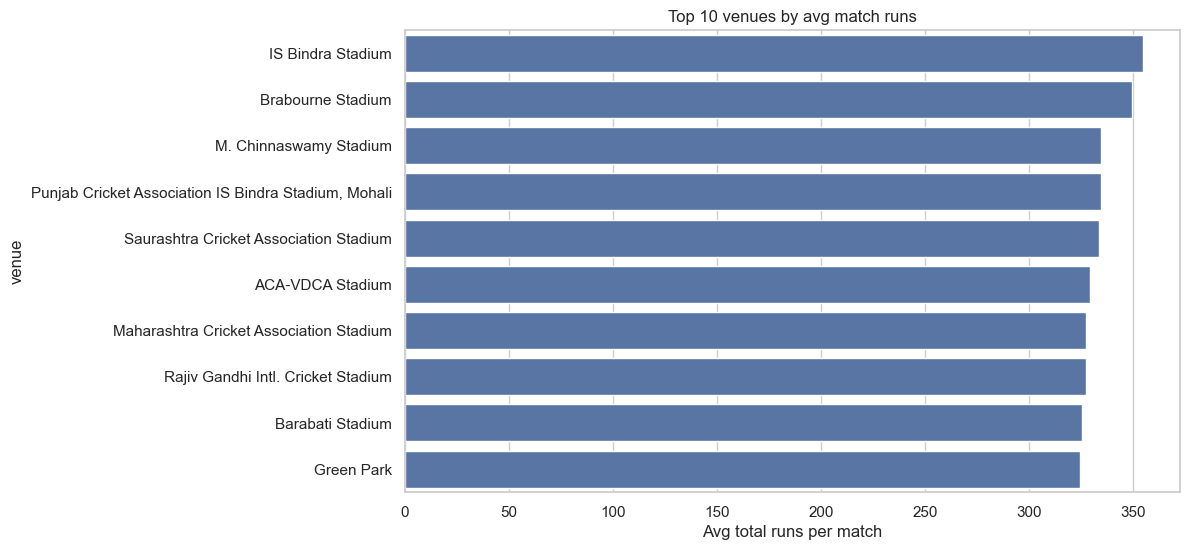


Sample per-season stats for top venue: IS Bindra Stadium


,Season,venue,matches_played,avg_total_runs,median_total_runs
125,IPL-2019,IS Bindra Stadium,7,354.571429,359.0


In [12]:
# Notebook cell — Run once: compute robust venue stats and per-season venue stats + plots
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ROOT = Path(r"C:\Users\thanv\Documents\Cricket_Player_Performance")
PROC = ROOT / "data" / "processed"
RAW = ROOT / "data" / "raw"
PROC.mkdir(parents=True, exist_ok=True)

# load cleaned files (use cleaned if available)
deliveries = pd.read_csv(PROC / "deliveries_cleaned.csv") if (PROC / "deliveries_cleaned.csv").exists() else pd.read_csv(RAW / "deliveries.csv")
matches = pd.read_csv(PROC / "matches_cleaned.csv") if (PROC / "matches_cleaned.csv").exists() else pd.read_csv(RAW / "matches.csv")

# --- auto-detect match id column in matches (by overlap with deliveries.match_id)
deliveries_ids = set(deliveries['match_id'].astype(str).unique())
candidate = None
for c in matches.columns:
    try:
        overlap = len(set(matches[c].astype(str).unique()).intersection(deliveries_ids))
        if overlap > 0:
            candidate = c
            break
    except Exception:
        continue

if candidate is None:
    raise RuntimeError("Could not detect match id column in matches automatically. Inspect matches.columns.")
# rename to match_id if needed
if candidate != 'match_id':
    matches = matches.rename(columns={candidate: 'match_id'})
matches['match_id'] = matches['match_id'].astype(str)
deliveries['match_id'] = deliveries['match_id'].astype(str)

# ensure date is parsed
if 'date_parsed' not in matches.columns:
    date_cols = [c for c in matches.columns if 'date' in c.lower()]
    if date_cols:
        matches['date_parsed'] = pd.to_datetime(matches[date_cols[0]], dayfirst=True, errors='coerce')
    else:
        matches['date_parsed'] = pd.NaT

# compute per-match total runs (sum of total_runs from deliveries)
match_totals = deliveries.groupby('match_id', as_index=False)['total_runs'].sum().rename(columns={'total_runs':'match_total_runs'})

# merge with matches to get venue & Season
mt = match_totals.merge(matches[['match_id','venue','Season','date_parsed']], on='match_id', how='left')

# venue-level stats
venue_stats = mt.groupby('venue').agg(
    matches_played = ('match_id','nunique'),
    avg_total_runs = ('match_total_runs','mean'),
    median_total_runs = ('match_total_runs','median'),
    std_total_runs = ('match_total_runs','std')
).sort_values('avg_total_runs', ascending=False)

# per-season per-venue stats
venue_season = mt.groupby(['Season','venue']).agg(
    matches_played = ('match_id','nunique'),
    avg_total_runs = ('match_total_runs','mean'),
    median_total_runs = ('match_total_runs','median')
).reset_index()

# Save outputs
venue_stats_path = PROC / "venue_stats_summary.csv"
venue_season_path = PROC / "venue_stats_per_season.csv"
venue_stats.to_csv(venue_stats_path)
venue_season.to_csv(venue_season_path, index=False)

# Print top 10 venues
print("Saved venue stats to:", venue_stats_path)
print("Saved venue-season stats to:", venue_season_path)
print("\nTop 10 venues by avg_total_runs:")
display(venue_stats.head(10))

# Plot top 10
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x=venue_stats.head(10)['avg_total_runs'].values, y=venue_stats.head(10).index)
plt.xlabel("Avg total runs per match")
plt.title("Top 10 venues by avg match runs")
plt.show()

# Show a season-venue sample pivot for the top venue
top_venue = venue_stats.index[0]
print("\nSample per-season stats for top venue:", top_venue)
display(venue_season[venue_season['venue']==top_venue].sort_values('Season').head(10))


Saved team wins per season to: C:\Users\thanv\Documents\Cricket_Player_Performance\data\processed\team_wins_per_season.csv
Wins pivot sample (first 6 seasons):


winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Royal Challengers Bangalore,Sunrisers Hyderabad
Season,,,,,,,,,,,,,
IPL-2008,9,2,7,0,10,0,6,7,0,13,0,4,0
IPL-2009,8,9,10,0,7,0,3,5,0,6,0,9,0
IPL-2010,9,8,7,0,4,0,7,11,0,6,0,8,0
IPL-2011,11,6,4,0,7,6,8,10,4,6,0,10,0
IPL-2012,10,4,11,0,8,0,12,10,4,7,0,8,0
IPL-2013,12,0,3,0,8,0,6,13,4,11,0,9,10


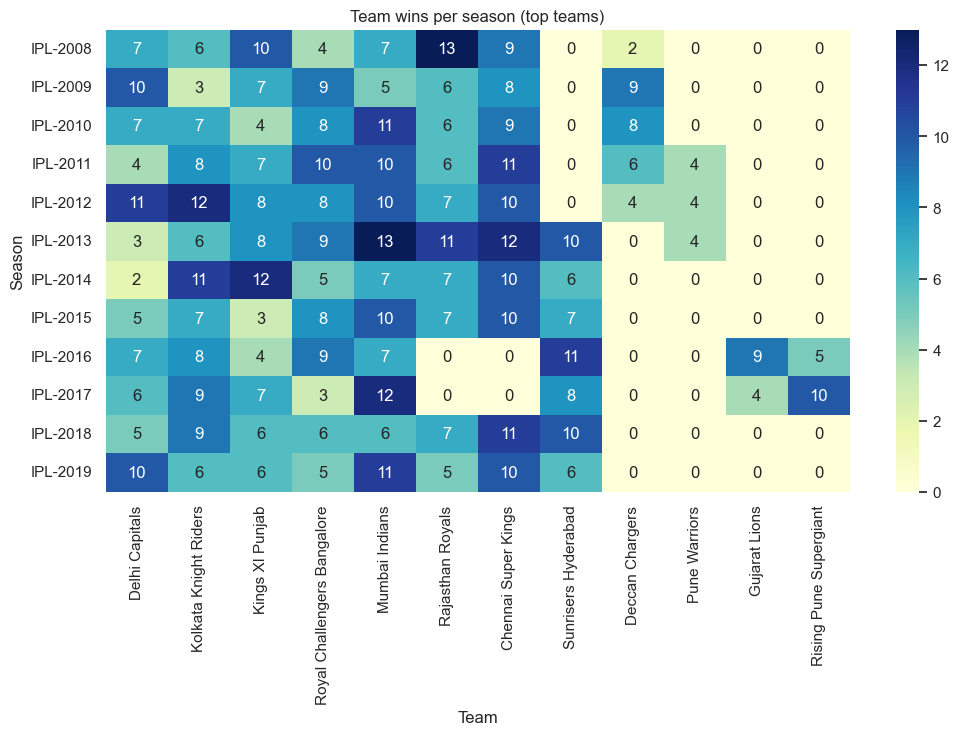


Saved team total runs per season to: C:\Users\thanv\Documents\Cricket_Player_Performance\data\processed\team_total_runs_per_season.csv
Team runs pivot sample (first 6 seasons):


batting_team,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
Season,,,,,,,,,,,,,,,
IPL-2008,2520,2229,0,2118,0,2464,0,1942,2080,0,2601,0,0,1983,0
IPL-2009,2231,2408,0,2131,0,1928,0,1772,1897,0,1706,0,0,2280,0
IPL-2010,2604,2374,0,2155,0,2288,0,2144,2737,0,2179,0,0,2401,0
IPL-2011,2560,2140,0,2087,0,2224,1901,2023,2288,1775,1687,0,0,2469,0
IPL-2012,2831,2312,0,2645,0,2390,0,2504,2462,2321,2516,0,0,2472,0
IPL-2013,2778,0,0,2245,0,2428,0,2290,2975,2262,2705,0,0,2601,2318


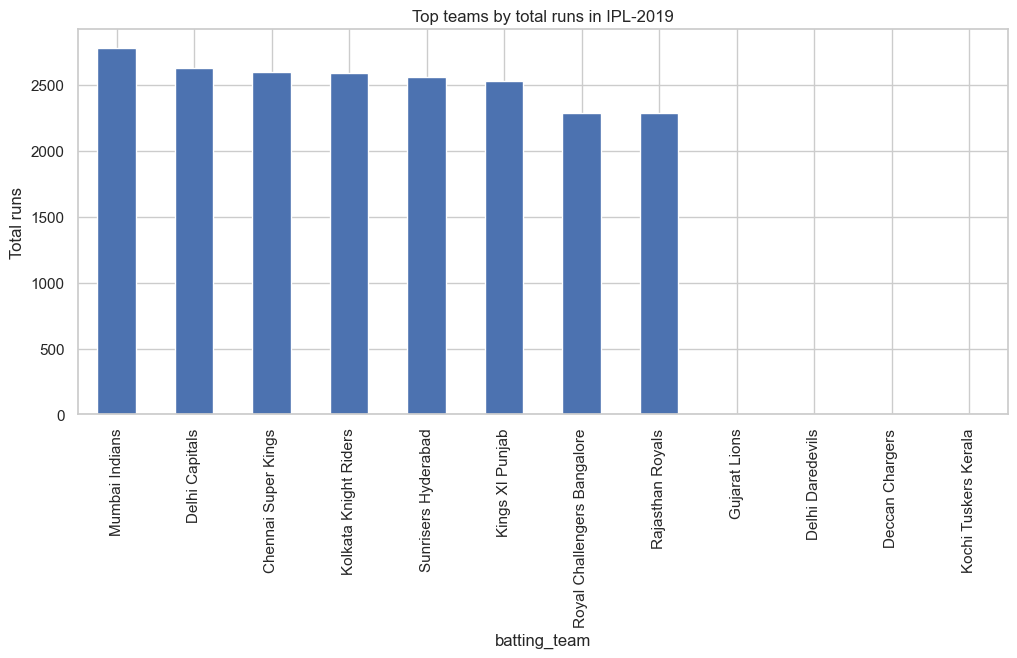

In [19]:
# CORRECTED CELL — Team performance over seasons: wins & total runs (robust)
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ROOT = Path(r"C:\Users\thanv\Documents\Cricket_Player_Performance")
PROC = ROOT / "data" / "processed"
RAW = ROOT / "data" / "raw"

# load cleaned files
matches = pd.read_csv(PROC / "matches_cleaned.csv")
deliveries = pd.read_csv(PROC / "deliveries_cleaned.csv")

# ensure date parsed
if 'date_parsed' in matches.columns:
    matches['date_parsed'] = pd.to_datetime(matches['date_parsed'], errors='coerce')

# 1) Wins per team per season (pivot)
wins = matches.dropna(subset=['winner']).groupby(['Season','winner']).size().rename('wins').reset_index()
wins_pivot = wins.pivot(index='Season', columns='winner', values='wins').fillna(0).astype(int)
wins_csv = PROC / "team_wins_per_season.csv"
wins_pivot.to_csv(wins_csv)
print("Saved team wins per season to:", wins_csv)
print("Wins pivot sample (first 6 seasons):")
display(wins_pivot.head(6))

# plot heatmap of wins (limit to top teams for readability)
top_teams = wins['winner'].value_counts().head(12).index.tolist()
wins_small = wins_pivot[top_teams] if set(top_teams).issubset(wins_pivot.columns) else wins_pivot
plt.figure(figsize=(12,6))
sns.heatmap(wins_small, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Team wins per season (top teams)")
plt.xlabel("Team")
plt.ylabel("Season")
plt.show()

# 2) Total runs per team per season (robust version)
# Ensure match_id alignment (some files use 'id' in matches)
deliveries['match_id'] = deliveries['match_id'].astype(str)

# detect correct id in matches and rename if needed (safe)
candidate = None
deliveries_ids = set(deliveries['match_id'].unique())
for c in matches.columns:
    try:
        overlap = len(set(matches[c].astype(str).unique()).intersection(deliveries_ids))
        if overlap > 0:
            candidate = c
            break
    except Exception:
        continue

if candidate is None:
    # fallback common names
    for c in ['match_id','id','ID','matchId','MatchID']:
        if c in matches.columns:
            candidate = c
            break

if candidate is None:
    raise RuntimeError("Could not detect match id column in matches. Inspect matches.columns.")

if candidate != 'match_id':
    matches = matches.rename(columns={candidate: 'match_id'})
matches['match_id'] = matches['match_id'].astype(str)

# compute total runs by batting_team per match, merge season and aggregate
match_team_runs = deliveries.groupby(['match_id','batting_team'])['total_runs'].sum().reset_index()
match_team_runs = match_team_runs.merge(matches[['match_id','Season']], on='match_id', how='left')

team_runs_season = match_team_runs.groupby(['Season','batting_team'])['total_runs'].sum().reset_index()
team_runs_pivot = team_runs_season.pivot(index='Season', columns='batting_team', values='total_runs').fillna(0).astype(int)

team_runs_csv = PROC / "team_total_runs_per_season.csv"
team_runs_pivot.to_csv(team_runs_csv)
print("\nSaved team total runs per season to:", team_runs_csv)
print("Team runs pivot sample (first 6 seasons):")
display(team_runs_pivot.head(6))

# bar plot for latest season (safely get latest if pivot is non-empty)
if len(team_runs_pivot.index) > 0:
    latest_season = sorted(team_runs_pivot.index)[-1]
    plt.figure(figsize=(12,5))
    team_runs_pivot.loc[latest_season].sort_values(ascending=False).head(12).plot(kind='bar')
    plt.title(f"Top teams by total runs in {latest_season}")
    plt.ylabel("Total runs")
    plt.show()
else:
    print("team_runs_pivot is empty — no data to plot.")



In [15]:
# ONE CELL — fix matches match_id (if needed), then compute team total runs per season and save+display
from pathlib import Path
import pandas as pd
import numpy as np

ROOT = Path(r"C:\Users\thanv\Documents\Cricket_Player_Performance")
PROC = ROOT / "data" / "processed"

# load cleaned files
deliveries = pd.read_csv(PROC / "deliveries_cleaned.csv")
matches = pd.read_csv(PROC / "matches_cleaned.csv")

# --- auto-detect match id column in matches
deliveries_ids = set(deliveries['match_id'].astype(str).unique())
candidate = None
for c in matches.columns:
    try:
        overlap = len(set(matches[c].astype(str).unique()).intersection(deliveries_ids))
        if overlap > 0:
            candidate = c
            break
    except Exception:
        continue

if candidate is None:
    # fallback to common names
    for c in ['match_id','id','ID','matchId','MatchID']:
        if c in matches.columns:
            candidate = c
            break

if candidate is None:
    raise RuntimeError("Could not detect match id column in matches automatically. Columns: " + str(matches.columns.tolist()))

# rename to match_id if needed and coerce to string
if candidate != 'match_id':
    matches = matches.rename(columns={candidate: 'match_id'})
matches['match_id'] = matches['match_id'].astype(str)
deliveries['match_id'] = deliveries['match_id'].astype(str)

print("Using matches column '{}' as match_id (renamed if needed).".format(candidate))

# ensure Season exists; if not try to create from date_parsed
if 'Season' not in matches.columns:
    if 'date_parsed' in matches.columns:
        matches['date_parsed'] = pd.to_datetime(matches['date_parsed'], errors='coerce')
        matches['Season'] = matches['date_parsed'].dt.year.astype(str)
    else:
        matches['Season'] = 'Unknown'

# Compute total runs per match per batting_team, merge Season, aggregate by Season & team
match_team_runs = deliveries.groupby(['match_id','batting_team'])['total_runs'].sum().reset_index()
match_team_runs = match_team_runs.merge(matches[['match_id','Season']], on='match_id', how='left')

team_runs_season = match_team_runs.groupby(['Season','batting_team'])['total_runs'].sum().reset_index()
team_runs_pivot = team_runs_season.pivot(index='Season', columns='batting_team', values='total_runs').fillna(0).astype(int)

# Save and show sample
out_csv = PROC / "team_total_runs_per_season_fixed.csv"
team_runs_pivot.to_csv(out_csv)
print("Saved team total runs per season to:", out_csv)
print("\nTeam runs pivot sample (first 6 seasons):")
display(team_runs_pivot.head(6))


Using matches column 'id' as match_id (renamed if needed).
Saved team total runs per season to: C:\Users\thanv\Documents\Cricket_Player_Performance\data\processed\team_total_runs_per_season_fixed.csv

Team runs pivot sample (first 6 seasons):


batting_team,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
Season,,,,,,,,,,,,,,,
IPL-2008,2520,2229,0,2118,0,2464,0,1942,2080,0,2601,0,0,1983,0
IPL-2009,2231,2408,0,2131,0,1928,0,1772,1897,0,1706,0,0,2280,0
IPL-2010,2604,2374,0,2155,0,2288,0,2144,2737,0,2179,0,0,2401,0
IPL-2011,2560,2140,0,2087,0,2224,1901,2023,2288,1775,1687,0,0,2469,0
IPL-2012,2831,2312,0,2645,0,2390,0,2504,2462,2321,2516,0,0,2472,0
IPL-2013,2778,0,0,2245,0,2428,0,2290,2975,2262,2705,0,0,2601,2318


Top 20 batsmen by total runs (all time):


,batsman,runs_total,matches_played,balls_faced,runs_per_match,strike_rate,highest_score
486,V Kohli,5434,169,4211,32.153846,129.042983,113
428,SK Raina,5415,189,4044,28.650794,133.902077,100
367,RG Sharma,4914,182,3816,27.000000,128.773585,109
112,DA Warner,4741,126,3398,37.626984,139.523249,126
392,S Dhawan,4631,158,3775,29.310127,122.675497,98
92,CH Gayle,4560,124,3131,36.774194,145.640370,175
290,MS Dhoni,4477,170,3318,26.335294,134.930681,89
384,RV Uthappa,4444,170,3490,26.141176,127.335244,87
26,AB de Villiers,4428,142,2976,31.183099,148.790323,133
147,G Gambhir,4223,151,3524,27.966887,119.835414,93


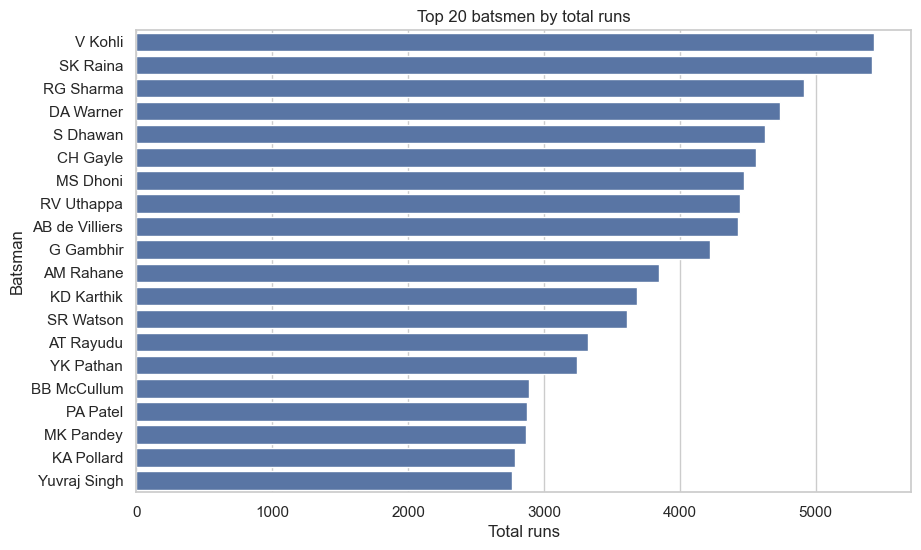


Top 20 batsmen by strike rate (min 1000 balls):


,batsman,strike_rate,runs_total,balls_faced,matches_played
374,RR Pant,162.318841,1792,1104,54
488,V Sehwag,148.827059,2728,1833,104
26,AB de Villiers,148.790323,4428,2976,142
92,CH Gayle,145.640370,4560,3131,124
213,KA Pollard,141.751527,2784,1964,132
112,DA Warner,139.523249,4741,3398,126
509,YK Pathan,138.860326,3241,2334,153
223,KL Rahul,137.406143,2013,1465,58
444,SR Watson,136.997726,3614,2638,130
111,DA Miller,136.290909,1874,1375,77


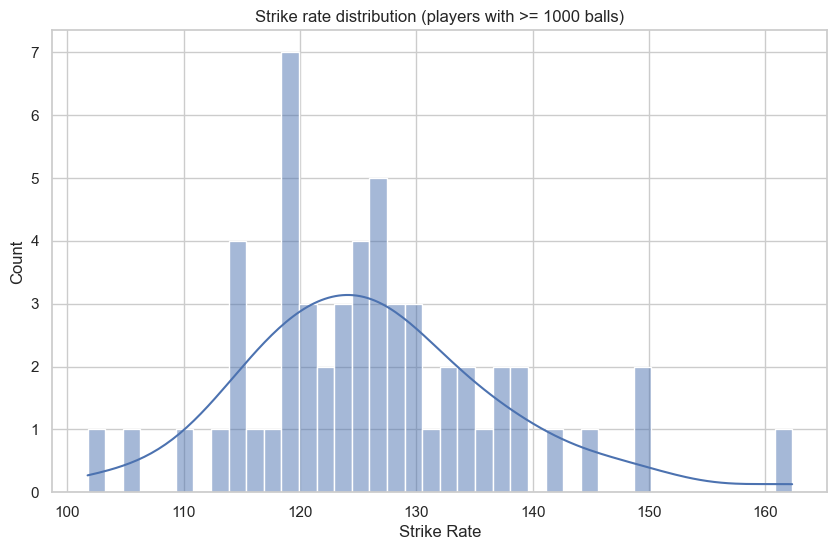


Top 20 consistent performers (avg_runs/std with >=30 matches):


,batsman,matches_played,avg_runs_per_match,std_runs_per_match,consistency_score
52,AS Yadav,35,28.857143,20.851214,1.383955
361,RA Jadeja,125,15.608000,11.387526,1.370622
290,MS Dhoni,170,26.335294,19.340898,1.361638
349,R Dravid,82,26.512195,19.519692,1.358228
442,SPD Smith,72,28.430556,21.091235,1.347980
144,F du Plessis,64,29.281250,21.833038,1.341144
202,JP Duminy,75,27.213333,20.454494,1.330433
443,SR Tendulkar,78,29.910256,22.656776,1.320146
282,ML Hayden,32,34.593750,26.457342,1.307529
227,KP Pietersen,36,27.805556,22.021833,1.262636



Saved player summary to: C:\Users\thanv\Documents\Cricket_Player_Performance\data\processed\player_stats_summary.csv


In [16]:
# ONE CELL — Player-level EDA: top scorers, strike rates, consistency
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ROOT = Path(r"C:\Users\thanv\Documents\Cricket_Player_Performance")
PROC = ROOT / "data" / "processed"

# load data
deliveries = pd.read_csv(PROC / "deliveries_cleaned.csv")
batsman_match = pd.read_csv(PROC / "batsman_match.csv")   # aggregated per match (not model-ready)
model_ready = pd.read_csv(PROC / "batsman_match_model_ready.csv")

# Ensure types
deliveries['match_id'] = deliveries['match_id'].astype(str)

# 1) Per-batsman aggregates from deliveries (balls faced & runs)
# Consider balls faced = count of deliveries for which the batsman is recorded (simple, acceptable)
balls_faced = deliveries.groupby('batsman').size().rename('balls_faced')
runs_total = deliveries.groupby('batsman')['batsman_runs'].sum().rename('runs_total')

# 2) Per-batsman aggregates from batsman_match (matches played, avg, hs, std)
matches_played = batsman_match.groupby('batsman')['match_id'].nunique().rename('matches_played')
runs_per_match_mean = batsman_match.groupby('batsman')['runs'].mean().rename('avg_runs_per_match')
runs_per_match_std = batsman_match.groupby('batsman')['runs'].std().rename('std_runs_per_match').fillna(0)
highest_score = batsman_match.groupby('batsman')['runs'].max().rename('highest_score')

# combine into a summary DF
player_stats = pd.concat([runs_total, balls_faced, matches_played, runs_per_match_mean, runs_per_match_std, highest_score], axis=1).reset_index()
player_stats['strike_rate'] = (player_stats['runs_total'] / player_stats['balls_faced'] * 100).replace([np.inf, -np.inf], np.nan)
player_stats['runs_per_match'] = (player_stats['runs_total'] / player_stats['matches_played']).replace([np.inf, -np.inf], np.nan)

# Save summary
out_csv = PROC / "player_stats_summary.csv"
player_stats.to_csv(out_csv, index=False)

# 3) Top 20 by total runs
top_runs = player_stats.sort_values('runs_total', ascending=False).head(20)
print("Top 20 batsmen by total runs (all time):")
display(top_runs[['batsman','runs_total','matches_played','balls_faced','runs_per_match','strike_rate','highest_score']])

# Plot top 20 total runs
plt.figure(figsize=(10,6))
sns.barplot(x='runs_total', y='batsman', data=top_runs, orient='h')
plt.title("Top 20 batsmen by total runs")
plt.xlabel("Total runs")
plt.ylabel("Batsman")
plt.show()

# 4) Strike rate — filter to players with reasonable sample size (min balls)
min_balls = 1000
sr_filtered = player_stats[player_stats['balls_faced'] >= min_balls].sort_values('strike_rate', ascending=False)
top_sr = sr_filtered.head(20)
print("\nTop 20 batsmen by strike rate (min {} balls):".format(min_balls))
display(top_sr[['batsman','strike_rate','runs_total','balls_faced','matches_played']])

plt.figure(figsize=(10,6))
sns.histplot(sr_filtered['strike_rate'].dropna(), bins=40, kde=True)
plt.title(f"Strike rate distribution (players with >= {min_balls} balls)")
plt.xlabel("Strike Rate")
plt.show()

# 5) Consistency: show players with high avg and low std (stable scorers) — a small sample
player_stats['consistency_score'] = player_stats['avg_runs_per_match'] / (player_stats['std_runs_per_match'] + 1e-6)
consistency_sample = player_stats[player_stats['matches_played'] >= 30].sort_values('consistency_score', ascending=False).head(20)
print("\nTop 20 consistent performers (avg_runs/std with >=30 matches):")
display(consistency_sample[['batsman','matches_played','avg_runs_per_match','std_runs_per_match','consistency_score']])

print("\nSaved player summary to:", out_csv)


In [1]:
# find variants and export for manual mapping
from pathlib import Path
import pandas as pd

ROOT = Path(r"C:\Users\thanv\Documents\Cricket_Player_Performance")
PROC = ROOT/"data"/"processed"
matches = pd.read_csv(PROC/"matches_cleaned.csv")
# show unique teams and venues
teams = pd.Series(sorted(set(matches['team1'].unique()).union(set(matches['team2'].unique()))))
venues = pd.Series(sorted(matches['venue'].dropna().unique()))
teams.to_frame("team").to_csv(PROC/"unique_teams.csv", index=False)
venues.to_frame("venue").to_csv(PROC/"unique_venues.csv", index=False)
print("Saved unique_teams.csv and unique_venues.csv — inspect and edit mapping if needed.")

Saved unique_teams.csv and unique_venues.csv — inspect and edit mapping if needed.


In [3]:
# Fix & export matches_for_home_matching.csv (auto-detect id column and create venue_clean)
from pathlib import Path
import pandas as pd

ROOT = Path(r"C:\Users\thanv\Documents\Cricket_Player_Performance")
PROC = ROOT / "data" / "processed"

matches = pd.read_csv(PROC / "matches_cleaned.csv")

# auto-detect match id column (common names or by overlap with sample)
candidate = None
common_id_names = ['match_id','id','ID','matchId','MatchID']
for c in common_id_names:
    if c in matches.columns:
        candidate = c
        break

# if not found among commons, fallback to first column that looks numeric and unique-ish
if candidate is None:
    for c in matches.columns:
        if matches[c].nunique() == len(matches) and pd.api.types.is_integer_dtype(matches[c].dropna()):
            candidate = c
            break

if candidate is None:
    raise RuntimeError("Could not detect an id-like column in matches. Columns: " + str(matches.columns.tolist()))

# rename to match_id if necessary
if candidate != 'match_id':
    matches = matches.rename(columns={candidate: 'match_id'})
matches['match_id'] = matches['match_id'].astype(str)

# create venue_clean for manual matching
matches['venue_clean'] = matches['venue'].astype(str).str.lower().str.replace(r'[^a-z0-9 ]','',regex=True).str.strip()
out_path = PROC / "matches_for_home_matching.csv"
matches[['match_id','team1','team2','venue','venue_clean','city']].to_csv(out_path, index=False)

print("Used column '{}' as match_id and saved:".format(candidate), out_path)
print("Sample rows:")
display(matches[['match_id','team1','team2','venue','venue_clean','city']].head(8))


Used column 'id' as match_id and saved: C:\Users\thanv\Documents\Cricket_Player_Performance\data\processed\matches_for_home_matching.csv
Sample rows:


,match_id,team1,team2,venue,venue_clean,city
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",rajiv gandhi international stadium uppal,Hyderabad
1,2,Mumbai Indians,Rising Pune Supergiant,Maharashtra Cricket Association Stadium,maharashtra cricket association stadium,Pune
2,3,Gujarat Lions,Kolkata Knight Riders,Saurashtra Cricket Association Stadium,saurashtra cricket association stadium,Rajkot
3,4,Rising Pune Supergiant,Kings XI Punjab,Holkar Cricket Stadium,holkar cricket stadium,Indore
4,5,Royal Challengers Bangalore,Delhi Capitals,M Chinnaswamy Stadium,m chinnaswamy stadium,Bangalore
5,6,Gujarat Lions,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",rajiv gandhi international stadium uppal,Hyderabad
6,7,Kolkata Knight Riders,Mumbai Indians,Wankhede Stadium,wankhede stadium,Mumbai
7,8,Royal Challengers Bangalore,Kings XI Punjab,Holkar Cricket Stadium,holkar cricket stadium,Indore


In [4]:
# ONE CELL: Add innings-phase (powerplay/middle/death) and aggregate per batsman-match-phase
from pathlib import Path
import pandas as pd

ROOT = Path(r"C:\Users\thanv\Documents\Cricket_Player_Performance")
PROC = ROOT / "data" / "processed"

deliveries = pd.read_csv(PROC / "deliveries_cleaned.csv")

# ensure numeric over
deliveries['over'] = deliveries['over'].astype(int)

def phase_of_over(over):
    if over <= 6:
        return "powerplay"
    elif over <= 15:
        return "middle"
    else:
        return "death"

deliveries['phase'] = deliveries['over'].apply(phase_of_over)

# Save deliveries with phase
out_deliveries = PROC / "deliveries_with_phase.csv"
deliveries.to_csv(out_deliveries, index=False)

# Aggregate per batsman-match-phase
agg = deliveries.groupby(['match_id','batsman','phase'], as_index=False).agg(
    runs = ('batsman_runs','sum'),
    balls = ('ball','count')
)
out_agg = PROC / "batsman_match_phase_agg.csv"
agg.to_csv(out_agg, index=False)

# Print summary
print("Saved deliveries with phase to:", out_deliveries)
print("Saved batsman-match-phase aggregate to:", out_agg)
print("\nSample aggregated rows (first 8):")
display(agg.head(8))
print("\nCounts by phase (aggregated rows):")
print(agg['phase'].value_counts())

Saved deliveries with phase to: C:\Users\thanv\Documents\Cricket_Player_Performance\data\processed\deliveries_with_phase.csv
Saved batsman-match-phase aggregate to: C:\Users\thanv\Documents\Cricket_Player_Performance\data\processed\batsman_match_phase_agg.csv

Sample aggregated rows (first 8):


,match_id,batsman,phase,runs,balls
0,1,A Choudhary,death,6,2
1,1,BCJ Cutting,death,16,6
2,1,CH Gayle,middle,6,3
3,1,CH Gayle,powerplay,26,20
4,1,DA Warner,powerplay,14,9
5,1,DJ Hooda,death,16,12
6,1,KM Jadhav,middle,31,18
7,1,MC Henriques,death,0,2



Counts by phase (aggregated rows):
phase
middle       6214
death        5608
powerplay    5084
Name: count, dtype: int64
